<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Chap -4- Machine learning applications/2- Model Selection.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sélection de Modele

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

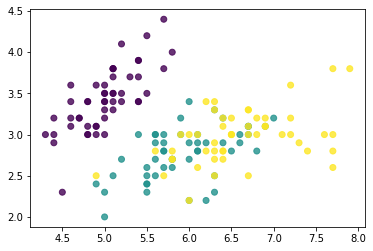

In [15]:
iris = load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

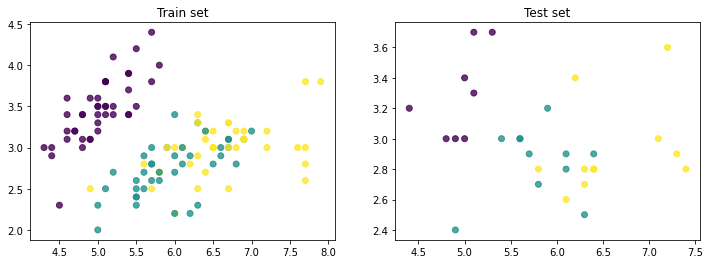

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set')

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.9833333333333333
test score: 0.9666666666666667


## Validation Set et Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

In [7]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

### Kfold

In [11]:
from sklearn.model_selection import KFold
model = KNeighborsClassifier()
cv= KFold()
cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

array([1.        , 0.95833333, 1.        , 0.95833333, 0.95833333])

### ShuffleSplit

In [13]:
from sklearn.model_selection import ShuffleSplit
model = KNeighborsClassifier()
cv= ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

array([1.        , 0.93333333, 0.86666667, 1.        , 1.        ])

### LeaveOneOut

In [14]:
from sklearn.model_selection import LeaveOneOut
model = KNeighborsClassifier()
cv= LeaveOneOut()
cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

### StratifiedKFold

In [17]:
from sklearn.model_selection import StratifiedKFold
model = KNeighborsClassifier()
cv= StratifiedKFold(n_splits=5,  shuffle=True)
cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

array([0.95833333, 0.95833333, 0.95833333, 1.        , 0.95833333])

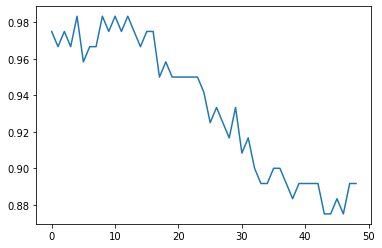

In [20]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

## Validation Curve

In [11]:
from sklearn.model_selection import validation_curve

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


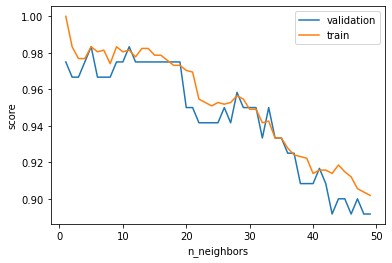

In [12]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          'n_neighbors', k, cv=10)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

## GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [19]:
print(grid.best_score_)
print(grid.best_params_)

0.9833333333333334
{'metric': 'euclidean', 'n_neighbors': 5}


In [16]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

## Learning Curve

In [19]:
from sklearn.model_selection import learning_curve


[ 9 19 28 38 48 57 67 76 86 96]


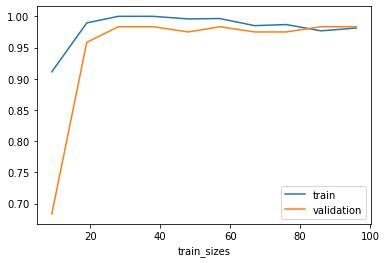

In [20]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## Metrics d'evaluation
## Erreur moyen MAE et MSE

In [8]:
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X + np.random.randn(m, 1)
model = LinearRegression()
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

0.8881140743377214

MAE:  0.8051083770818453
MSE:  1.0041468286404196
MdAE 0.6846679204665103


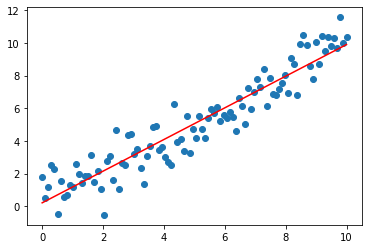

In [6]:
plt.scatter(X, y)
y_pred =model.predict(X)
plt.plot(X, y_pred, c='red')

print("MAE: ",mean_absolute_error(y,y_pred))
print("MSE: ",np.sqrt(mean_squared_error(y,y_pred)))
print("MdAE",median_absolute_error(y,y_pred))

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))


### Metrics d'evaluation des modeles

In [9]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [42]:
model = KNeighborsClassifier()
print(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))
print(cross_val_score(model, X_train, y_train, cv=5, scoring='f1_micro'))
print(cross_val_score(model, X_train, y_train, cv=5, scoring='precision_micro'))

[1.         1.         1.         0.95833333 0.95833333]
[1.         1.         1.         0.95833333 0.95833333]
[1.         1.         1.         0.95833333 0.95833333]


## Exercice et solution
Pour cet exercice, appliquez ce que nous avons appris sur la sélection de modèles sur le jeu de données Titanic :
   - Créer un Train-Set et un Test-set. s'entraîner puis évaluer
   - Avec GridSearch, trouvez les meilleurs hyper-paramètres, métriques et pondérations n_neighbors
   - La collecte de plus de données sera-t-elle utile ?

In [22]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()
y= titanic[ 'survived']
X= titanic.drop('survived', axis =1)

print(y.shape)
print(X.shape)

(714,)
(714, 3)


(571, 3)
(143,)
0.7705081669691469 {'metric': 'manhattan', 'n_neighbors': 13}
0.8251748251748252
[ 45  91 136 182 228 273 319 364 410 456]


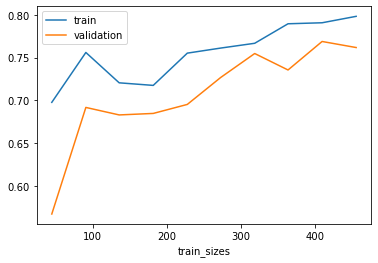

In [23]:
# data splite
X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.2)
print(X_train.shape)
print(y_test.shape)
# train model
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=10)
grid.fit(X_train,y_train)
# get the best estimator
print (grid.best_score_, grid.best_params_)
model=grid.best_estimator_
print(model.score(X_test,y_test))
# evalutate the mode
confusion_matrix(y_test,model.predict(X_test))

# get the learning curve
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()